In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [ ]:
pd.set_option('display.max_columns',None)  # optional;- only for this time not always use

loading the file from excel

- sheet is different from the default one
- data has some not usefull records, which will be skipped

In [ ]:
df = pd.read_excel('Canada.xlsx', sheet_name=1, skiprows=20, skipfooter=2)
df.head()


Summarize data

In [ ]:
df.info()

check missing entry


In [ ]:
df.isnull().sum() 

Check the names of numerical and categorical columns


In [ ]:
print("columns with numeric data")
print(df.select_dtypes(include='number').columns.tolist())
print("columns with non numeric data")
print(df.select_dtypes(exclude='number').columns.tolist())

Describe numerical data

In [ ]:
df.describe() # by default numeric columns are consideredd

Dscribe non-numerical data

In [ ]:
df.describe(exclude='number')

Data Wrangling 
- means to clean the data to removing errors,organising data into a desired format

In [ ]:
df.head(10)

Drop columns that are not required

In [ ]:
cols_to_drop=['Type','Coverage','AREA','DEV','REG']
df.drop(columns=cols_to_drop,inplace=True)
df.head()

Renaming the columns to something meaningful

In [ ]:
rename_dict={'OdName':'Country',
             'AreaName': 'Continent',
             'RegName':'Region',
             'DevName':'Status'}
df.rename(columns=rename_dict,inplace=True)
df.head()


Add a column 'total' which tells the total country wise immigration

In [ ]:
years=list(range(1980,2014))
df['Total']=df[years].sum(axis=1)  #doubt: axis=1?
df.head()

Since Each country is unique,i'll use country as index

In [ ]:
df.set_index('Country',inplace=True)


In [ ]:
df.head()

Analysis
- analyse a country trend of immigration
- compare multiple countries trwnd
- provide a trend comparing total immigration per year
- compare top five country immigration trend

In [ ]:
df.head()

In [ ]:
df.index.tolist()

In [ ]:
df.loc['Albania',years].plot(figsize=(10,5), title="Albania's immigration trend",style= 'ro--')


In [ ]:
df.loc['India',years].plot(kind='area',figsize=(10,5), title="India's immigration trend",alpha= 0.5)


In [ ]:
countries = ['India','Pakistan']
df.loc[countries, years].T.plot(figsize=(15,5), kind='area', alpha=0.6, stacked=False)

In [ ]:
df.sort_values(by='Total', ascending=False, inplace=True)


In [ ]:
df.head()[years].T


In [ ]:
countries = df.head().index.tolist()
df.loc[countries, years].T

In [ ]:
df.head()[years].T.plot(figsize=(15,6), kind='area', stacked=False, alpha=.2)


In [ ]:
df.loc['Philippines',years].plot(figsize=(15,5))

In [ ]:
df.loc['Philippines',years].mean()


In [ ]:
df.loc['Philippines',years].plot(figsize=(15,5))
plt.xticks(ticks=range(0, len(years)), labels=years, rotation=90)
plt.text(0, 35000, "Philippines migration trend", fontdict={'fontsize':'14'})
plt.annotate("1993\nimmigration\nspike", (13, 20000),(9,22000), arrowprops={'arrowstyle':'->'})
plt.annotate("2010\nimmigration\nspike", (30, 39000), (25, 30000), arrowprops={'arrowstyle':'->'})
plt.vlines(30, 0, 50000, linestyles=':')
plt.vlines(13, 0, 50000, linestyles=':')
plt.hlines(df.loc['Philippines',years].mean(), 0, 34, linestyles=":", colors='red')
plt.text(0, df.loc['Philippines',years].mean()+1200, "Avg Immigration 15000/yr")
plt.show()

In [ ]:
top5df = df.head()[years].T.copy()
top5df.head()

In [ ]:
px.area(top5df, x=top5df.index, 
        y=['India','China','Philippines'],
        )

In [ ]:
df[years].sum()

In [ ]:
year_wise_trend=df[years].sum()
fig= px.funnel(year_wise_trend,year_wise_trend.index,
               year_wise_trend.values,
               title='year wise immigration trend',
               height=600)
fig.show()

In [ ]:
px.choropleth(
    data_frame=df,
    locations=df.index,
    locationmode='country names',
    color='Total',
    projection='orthographic'
)

In [ ]:
px.sunburst(
    data_frame=df,
    path=['Continent','Status','Region'],
    values='Total',
    names=df.index
)

In [ ]:
px.treemap(
    data_frame=df,
    path=['Continent','Status','Region'],
    values='Total',
    names=df.index
)

In [ ]:
px.scatter_3d(
    df,
    x=1980,
    y=1981,
    z=1982
)

In [ ]:
conti_df= df.groupby('Continent')[years].sum().T

In [ ]:
px.line(conti_df, x=conti_df.index, y=conti_df.columns)

In [ ]:
asia_df= df[df['Continent']=='Asia']
asia_df

<Axes: >

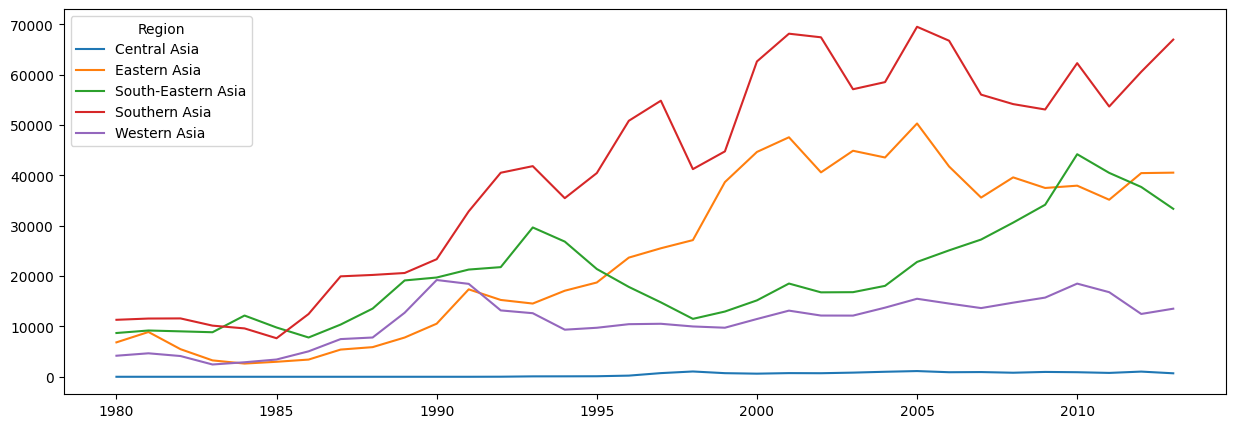

In [110]:
asia_df.groupby(by='Region')[years].sum().T.plot(figsize=(15,5))

In [ ]:
eighties= df[list(range(1980,1990))].sum(axis=1)
nineties= df[list(range(1990,2000))].sum(axis=1)
nhipata= df[list(range(2000,2010))].sum(axis=1)

In [ ]:
decade_df=pd.DataFrame({
    'eighties':eighties,
    'nineties':nineties,
    '2ks':nhipata
})

In [ ]:
status_df= df.pivot_table(index='Continent',columns='Status',values='Total',aggfunc='sum')
status_df

cleaning data that has problem using customised function


In [102]:
df1=pd.read_excel('bahut_kharab_data.xlsx')
df1.head()

,sno,Names,Age,Pincode
0,1,Ajay KumaR,45,202100
1,2,RAju Singh,34,230510al
2,3,VIKAS narayan ?,12,123311
3,4,Smarth Singh,NaN,293199
4,5,Vijay NiGAM,12,asd899212


df1

In [104]:
from string import ascii_letters
def clean_names(name):
    if isinstance (name,str):
        clean_name='' 
        for c in name:
            if c in ascii_letters+" ":
                clean_name+=c
        print("original name: ",name)
        print("cleaned name: ",clean_name)
        return clean_name.title().strip()
    else:
        return np.nan

In [105]:
df1['Names']=df1['Names'].apply(clean_names)
df1

original name:  Ajay KumaR
cleaned name:  Ajay KumaR
original name:  RAju Singh
cleaned name:  RAju Singh
original name:  VIKAS narayan ?
cleaned name:  VIKAS narayan 
original name:  Smarth Singh
cleaned name:  Smarth Singh
original name:  Vijay NiGAM
cleaned name:  Vijay NiGAM
original name:  Suresh PANDEY
cleaned name:  Suresh PANDEY
original name:  VIMLESH kumar
cleaned name:  VIMLESH kumar
original name:  Sunil Singh
cleaned name:  Sunil Singh
original name:  Amir ali
cleaned name:  Amir ali
original name:  Vimal KuMar..
cleaned name:  Vimal KuMar


,sno,Names,Age,Pincode
0,1,Ajay Kumar,45,202100
1,2,Raju Singh,34,230510al
2,3,Vikas Narayan,12,123311
3,4,Smarth Singh,NaN,293199
4,5,Vijay Nigam,12,asd899212
5,6,Suresh Pandey,A12,NaN
6,7,Vimlesh Kumar,32?,343234
7,8,Sunil Singh,NaN,NaN
8,9,Amir Ali,56,NaN
9,10,Vimal Kumar,56,NaN


In [106]:
from string import ascii_letters
def clean_age(age):
    if age==np.nan:
        return np.nan
    if isinstance (age,str):
        clean_age='' 
        for c in age:
            if c in "0123456789":
                clean_age+=c
        return int(clean_age)
    elif isinstance (age,(int,float)):
        return age
    else:
        return np.nan

In [107]:
df1['Age']=df1['Age'].apply(clean_age)
df1

,sno,Names,Age,Pincode
0,1,Ajay Kumar,45.0,202100
1,2,Raju Singh,34.0,230510al
2,3,Vikas Narayan,12.0,123311
3,4,Smarth Singh,NaN,293199
4,5,Vijay Nigam,12.0,asd899212
5,6,Suresh Pandey,12.0,NaN
6,7,Vimlesh Kumar,32.0,343234
7,8,Sunil Singh,NaN,NaN
8,9,Amir Ali,56.0,NaN
9,10,Vimal Kumar,56.0,NaN


In [108]:

def clean_pincode(Pincode):
    if Pincode==np.nan:
        return 0
    if isinstance (Pincode,str):
        clean_pincode='' 
        for c in Pincode:
            if c in "0123456789":
                clean_pincode+=c
        return int(clean_pincode)
    elif isinstance (Pincode,(int,float)):
        return Pincode
    else:
        return 0

In [109]:
df1['Pincode']=df1['Pincode'].apply(clean_pincode)
df1

,sno,Names,Age,Pincode
0,1,Ajay Kumar,45.0,202100.0
1,2,Raju Singh,34.0,230510.0
2,3,Vikas Narayan,12.0,123311.0
3,4,Smarth Singh,NaN,293199.0
4,5,Vijay Nigam,12.0,899212.0
5,6,Suresh Pandey,12.0,NaN
6,7,Vimlesh Kumar,32.0,343234.0
7,8,Sunil Singh,NaN,NaN
8,9,Amir Ali,56.0,NaN
9,10,Vimal Kumar,56.0,NaN
